# Century-Long Trends on Everest From the First Ascent to the Modern Era
## Introduction  
Even though many climbers lost their lives on Everest expeditions, the statistic has been growing over time. Therefore, I have investigated safety issues, such as mortality rates and the effects of the host, in addition to revealing key historical trends in Everest climbing, such as variations in the number of climbers, the seasons, and demographics like age and gender. This study's dataset, which covers Everest expeditions from 1953 until 2020, was obtained via Kaggle. With a better understanding of Everest expeditions, climbers, organizations, and researchers will be able to plan safer and more productive ascents.

In [1103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import functools
import pandas as pd
import itertools
import sklearn
import copy

## Reading Data
I am going to use a dataset available on Kaggle, a web source for datasets used in analysis. This dataset contains information regarding Everest expedi7ons from 1953 to 2020.

In [1104]:
data = pd.read_csv("Mt_Everest_Ascent_Data3.csv")

In [1105]:
data.shape

(10184, 11)

In [1106]:
data.head()

,Peak,Name,Yr/Seas,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Tenzing Norgay,1953 Spr,29-May,11:30,Nepal,M,39,Y,.,Nepal
1,EVER,Edmund Percival Hillary,1953 Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
2,EVER,Juerg P. Marmet,1956 Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
3,EVER,Ernst Schmied,1956 Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal
4,EVER,Adolf (Dolf) Reist,1956 Spr,24-May,11:00,Switzerland,M,35,Y,.,Nepal


## Data Processing
I have processed the data in a way to analyze the seasonal, yearly, and geographical distribution and future prediction. I have split the column 'Yr/Seas' into 'Year' and 'Seas' so that I can interpret the data distribution on a yearly and seasonal basis. There is a newly added column 'Decade' to see the trend in different decades. Also, I have created new columns 'Country', 'Continent', and 'Country Code' in the basis of the 'Citizenship' column to analyze the geographical distribution. Originally, the data is not valid country name in the dataset, so I have refined the geographical data to match the data with the 'pycountry' data set (A Python library for geographical interpretation.). Therefore, I can show the geographical trend of the Everest expedition over time.

In [1107]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import pycountry

#--------------'Yr/Seas' into 'Year' and 'Seas'---------------
data[['Year', 'Seas']] = data['Yr/Seas'].str.split(' ', expand=True)
data = data.drop(columns=['Yr/Seas'])
data['Year'] = pd.to_numeric(data['Year'], errors='coerce').astype('Int64')

#------------Geographical data process and cration----------------

data['Country'] = data['Citizenship'].str.split('/').str[0]

# Refine the country list with the common name
common_name = {
    'USA': 'United States',
    'W Germany': 'Korea, Republic of',
    'UK': "United Kingdom",
    'USSR': 'Russia',
    'S Korea': 'South Korea',
    'UAE': 'United Arab Emirates',
    'Iran': 'Iran, Islamic Republic of',
    'S Africa': 'South Africa',
}
data['Country'].replace(common_name, inplace=True)

#matching country name with pycountry
replacements = {
    'Bolivia': 'Bolivia, Plurinational State of',
    'South Korea': 'Korea, Republic of',
    'North Korea': "Korea, Democratic People's Republic of",
    'Moldova': 'Moldova, Republic of',
    'Taiwan': 'Taiwan, Province of China',
    'Tanzania': 'Tanzania, United Republic of',
    'Venezuela': 'Venezuela, Bolivarian Republic of',
    'Vietnam': 'Viet Nam',
}    
data['Country'].replace(replacements, inplace=True)

#Validating country with the pycountry library
valid_country_names = [country.name for country in pycountry.countries]
data = data[data['Country'].isin(valid_country_names)]
#len(sorted(data['Country'].unique()))

#---------------- New columns geographical columns creation: 'Continent', and 'Country Code'
g = lambda y: country_name_to_country_alpha2(y, cn_name_format="default") if pycountry.countries.get(name=y) else None
data['CountryCode'] = data['Country'].apply(g)
f = lambda x: country_alpha2_to_continent_code(x) if x else None
data["Continent"] = data['CountryCode'].apply(f)
data['Decade'] = ((data['Year'])//10) * 10

In [1108]:
print("Dataset heading after data processing:")
data.head()

Dataset heading after data processing:


,Peak,Name,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host,Year,Seas,Country,CountryCode,Continent,Decade
0,EVER,Tenzing Norgay,29-May,11:30,Nepal,M,39,Y,.,Nepal,1953,Spr,Nepal,NP,AS,1950
1,EVER,Edmund Percival Hillary,29-May,11:30,New Zealand,M,33,Y,.,Nepal,1953,Spr,New Zealand,NZ,OC,1950
2,EVER,Juerg P. Marmet,23-May,14:00,Switzerland,M,28,Y,.,Nepal,1956,Spr,Switzerland,CH,EU,1950
3,EVER,Ernst Schmied,23-May,14:00,Switzerland,M,31,Y,.,Nepal,1956,Spr,Switzerland,CH,EU,1950
4,EVER,Adolf (Dolf) Reist,24-May,11:00,Switzerland,M,35,Y,.,Nepal,1956,Spr,Switzerland,CH,EU,1950


# General Climbing Trends Over Time
I am going to analyze how the number of climbers has changed over the years and how the data distribution trends in the different variables like the season, age, gender, host, and continent.

**1. Overall expeditions trend over the decade by two different hosts**           
We can see the overall expedition numbers over the decade from the 1950s to the 2010s in the following bar chart. We can see that the popularity of the Everest climbing culture is increasing over time for both hosts. However, the data shows that more expeditions have been done from the host Nepal.

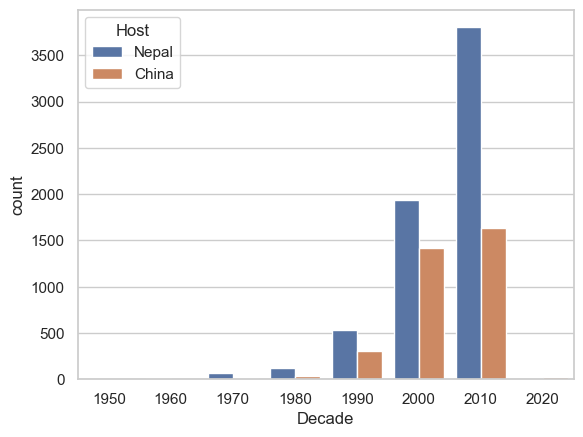

In [1109]:
import seaborn as sns
import warnings

sns.set_theme(style="whitegrid")
sns.countplot(x=data["Decade"], hue=data["Host"])

# Filter FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

**2. Climbing numbers in different Continents over time**      
As we know the fact, Tenzing Norgay from Nepal and Edmund Percival Hillary from New Zealand successfully climbed Mt. Everest in 1953. Among the different continents, it can be seen that the majority of submissions are done by Asians. It seems North America started to explore Everest in the 1960s and Europeans started in the 1970s, but the polarity of climbing Everest began in the 1980s for both North Americans and Europeans. Whereas, Africans and South Americans were the last in the race to explore Everest which is the 1990s. Overall, we can see the expeditions are getting increasing over time for all continents.

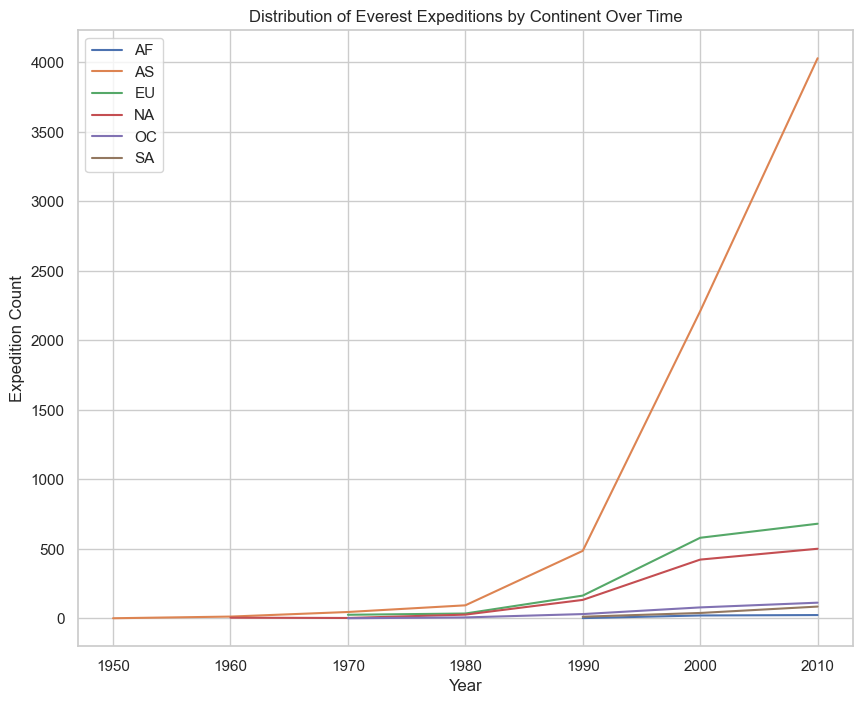

In [1110]:
import matplotlib.pyplot as plt

# Assuming 'data' contains the DataFrame with 'Continent' and 'Year' columns

filtered_data = data[~data['Decade'].between(2020, 2030)]

# Group the filtered data by 'Year' and 'Continent' to get the count of expeditions
expeditions_by_year_continent = filtered_data.groupby(['Decade', 'Continent']).size().unstack()

# Plotting the time series for each continent
plt.figure(figsize=(10, 8))

for continent in expeditions_by_year_continent.columns:
    plt.plot(expeditions_by_year_continent.index, expeditions_by_year_continent[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Expedition Count')
plt.title('Distribution of Everest Expeditions by Continent Over Time')
plt.legend()
plt.grid(True)
plt.show()


**3. Climbing Numbers in Different Countries**      
Among the different country, it can be seen that Nepal are at the top of the list with more than half of the expeditions. And the USA at the second with 9.8% expeditions. China, India, and the UK are in the 3rd, 4th, and 5th positions respectively.

Text(0.5, 1.0, 'Top 10 Countries and Others')

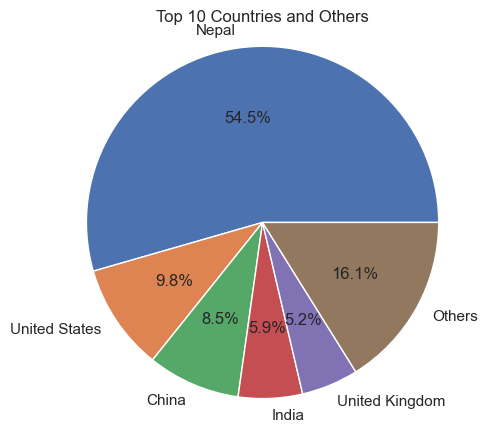

In [1111]:
country_counts = data['Country'].value_counts()

# Extracting the top 5 countries and grouping the rest
top_5_countries = country_counts.head(5)
other_countries = country_counts[5:]

# Concatenating the top 5 countries and the 'Others'
top_countries_and_others = pd.concat([top_5_countries, other])

# Combining all other countries into a single 'Others' category
other_total = other_countries.sum()

# Plotting a pie chart for top countries and 'Others'
plt.figure(figsize=(5, 5))
plt.pie(top_countries_and_others, labels=top_countries_and_others.index, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Top 10 Countries and Others')

**4. Gender and Age Distribution in Climbing**      
In climbing Everest gender distribution, very few numbers of climbers are Female. Also, the age between 25 to 40 is seeing top age group to for both Males and Females.

Text(0.5, 1.0, 'Age Distribution for Expeditions by Gender')

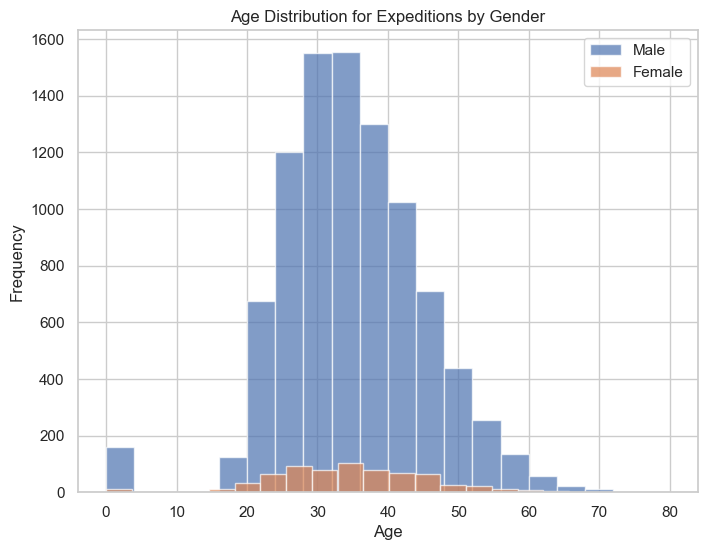

In [1112]:
# Filter data by gender
male_ages = data[data['Sex'] == 'M']['Age']
female_ages = data[data['Sex'] == 'F']['Age']

plt.figure(figsize=(8, 6))

# Plotting age distribution for males and females
plt.hist(male_ages, bins=20, alpha=0.7, label='Male')
plt.hist(female_ages, bins=20, alpha=0.7, label='Female')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Age Distribution for Expeditions by Gender')

**5. Future expedition prediction**   
I have tried different approaches like linear regression, Non-linear Regression, General additive models (GAM), Tree-based Methods, and more for future expedition prediction. However, I have chosen the GAM model by analyzing the scope of the model. I have found the number of expeditions will increase over time. The GAM model predicts that the total number of expeditions might be more than 1200 in the year 2030. Note: The data for the years 2014, 2015, and 2020 are excluded from the prediction model because there were very few expeditions in 2014 and 2015 because of disasters and insufficient data for 2020.

**Linear Regression**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     98.31
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.35e-13
Time:                        22:17:06   Log-Likelihood:                -319.45
No. Observations:                  50   AIC:                             642.9
Df Residuals:                      48   BIC:                             646.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.438e+04   2478.939     -9.836      0.0

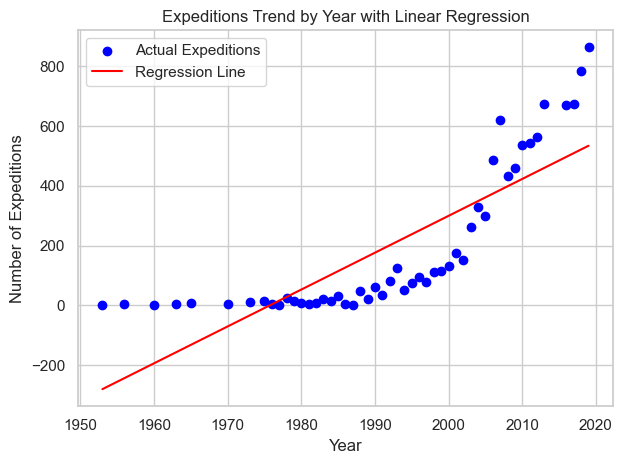

In [1113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Exclude problematic years (2014, 2015, and 2020) 
#there were very few expeditions in 2014 and 2015 because of disasters and insufficient data for 2020.
filtered_data = data[~data['Year'].isin([2014, 2015, 2020])]

expeditions_data = pd.DataFrame({'Year': expeditions_by_year.index.astype(int), 'Expeditions': expeditions_by_year.values}) 

# Calculate overall expeditions by year
overall_expeditions_by_year = filtered_data['Year'].value_counts().sort_index()

# Create features (years) and targets (expedition counts)
years = overall_expeditions_by_year.index.values.reshape(-1, 1)
expeditions = overall_expeditions_by_year.values

model = LinearRegression()
model.fit(years, expeditions)

expeditions_array = np.array(expeditions, dtype=float)

# Fit the linear regression
model = sm.OLS(expeditions_array, years_with_const).fit()

# Get the summary of the model
print(model1.summary())

plt.scatter(years, expeditions, color='blue', label='Actual Expeditions')

# Regression line plot
plt.plot(years, predictions, color='red', label='Regression Line')

plt.title('Expeditions Trend by Year with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Number of Expeditions')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

**Non-Linear Regression**
**(quadratic polynomial regression)**

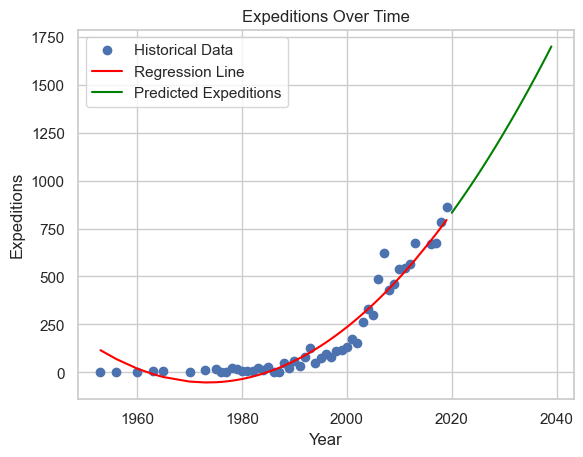

In [1114]:
from sklearn.preprocessing import PolynomialFeatures

years = np.array(expeditions_data['Year']).reshape(-1, 1)
expeditions = expeditions_data['Expeditions']

# Creating polynomial features (quadratic)
poly = PolynomialFeatures(degree=2)
years_poly = poly.fit_transform(years)

# Fitting a polynomial regression model
model = LinearRegression()
model.fit(years_poly, expeditions)

# Predicting with the model
predicted = model.predict(years_poly)

# Extend year range for prediction
years_future = np.array(list(range(2020, 2040))).reshape(-1, 1)
years_future_poly = poly.transform(years_future)

# Predicting for the next two decades
predicted_future = model.predict(years_future_poly)


# Plotting the data and regression curve
plt.scatter(expeditions_data['Year'], expeditions_data['Expeditions'], label='Historical Data')
plt.plot(expeditions_data['Year'], model.predict(poly.fit_transform(expeditions_data[['Year']])), color='red', label='Regression Line')

# Plotting predicted values for the next two decades
plt.plot(np.arange(2020, 2040), predicted_future, color='green', label='Predicted Expeditions')

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Expeditions')
plt.title('Expeditions Over Time')
plt.legend()
plt.grid(True)
plt.show()

## General additive models (GAM) : Best Model

MSE (GAM): 1556.7201679278305
R-squared (GAM): 0.9753783070405914


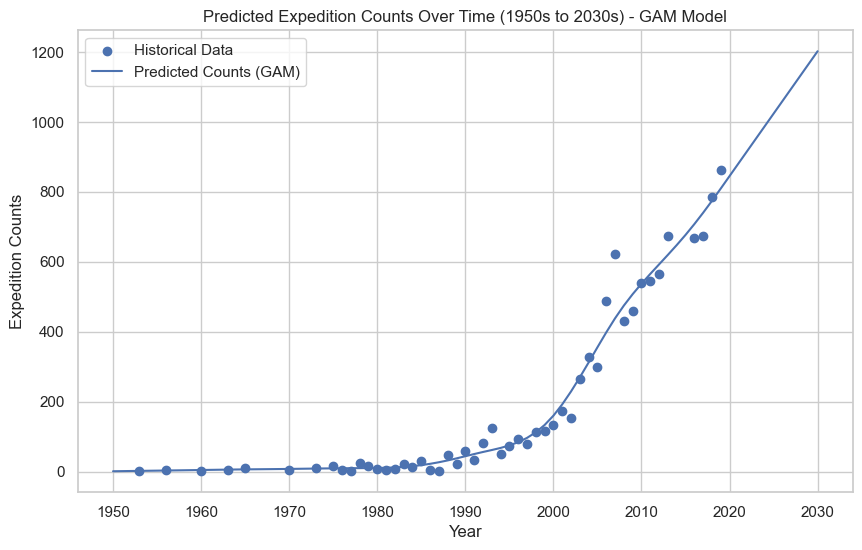

In [1115]:

from pygam import LinearGAM
from sklearn.metrics import mean_squared_error, r2_score

# Extracting features and target variable
X = expeditions_data['Year'].values.reshape(-1, 1)  # Features (Year)
y = expeditions_data['Expeditions'].values  # Target variable (Expeditions)

# Fit a GAM model
gam = LinearGAM().fit(X, y)

# Predict for future years (2020s and 2030s)
future_years = np.array([[2020], [2030]]) 
predicted_counts = gam.predict(X)

# Print predicted counts for the next two decades
years = np.arange(1950, 2031).reshape(-1, 1)


# Predict for all years
predicted_counts_all_years = gam.predict(years)

# Assuming 'y_true' is the true target variable and 'y_pred_gam' is the predicted values from GAM
mse_gam = mean_squared_error(y, predicted_counts)
r2_gam = r2_score(y, predicted_counts)

print(f"MSE (GAM): {mse_gam}")
print(f"R-squared (GAM): {r2_gam}")

# Plotting the predicted counts over time
plt.figure(figsize=(10, 6))
plt.scatter(expeditions_data['Year'], expeditions_data['Expeditions'], label='Historical Data')
plt.plot(years, predicted_counts_all_years, label='Predicted Counts (GAM)')

plt.xlabel('Year')
plt.ylabel('Expedition Counts')
plt.title('Predicted Expedition Counts Over Time (1950s to 2030s) - GAM Model')
plt.legend()
plt.grid(True)
plt.show()


**## Generalized Linear Model (Poisson Regression Model)**

In [1116]:
expeditions_by_year = overall_expeditions_by_year

expeditions_data['Expeditions'] = expeditions_data['Expeditions'].astype(int)

# Fit Poisson regression model
poisson_model = sm.GLM(expeditions_data['Expeditions'], sm.add_constant(expeditions_data['Year']), family=sm.families.Poisson()).fit()

# Print model summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Expeditions   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -625.62
Date:                Thu, 23 Nov 2023   Deviance:                       960.85
Time:                        22:17:07   Pearson chi2:                     950.
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.8076      2.132    -90.901      0.0

## Safety Analysis
**1. Expedition safety related to Host selection and use of Oxygen**    
According to the death data distribution, it seems that the host country Nepal is a better choice than China. The death rate of expeditions hosted by China is higher than Nepal.
I have selected the Logistic Regression Model to analyze the safety in terms of host selection and the impact of Oxygen in the Everest expeditions. It can be seen that the survival possibility will be high when people climb with oxygen.

**1.1. Death Rate by Host**  
Expeditions from the Chinese side have a higher death rate than the Nepal side. Also, the death rate is on the pick in the 1990s but the rate is decreasing over time.

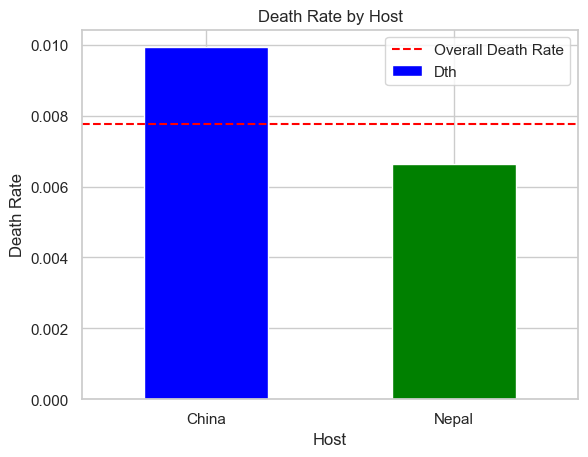

In [1117]:
overall_death_rate = (data['Dth'] == 'Y').mean()
death_rate_by_host = data.groupby('Host')['Dth'].apply(lambda x: (x == 'Y').mean())
death_rate_by_host.plot(kind='bar', color=['blue', 'green'])
plt.title('Death Rate by Host')
plt.xlabel('Host')
plt.ylabel('Death Rate')
plt.xticks(rotation=0)
plt.axhline(y=overall_death_rate, color='red', linestyle='--', label='Overall Death Rate')
plt.legend()
plt.show()

**Death Rate over the time in different host**  


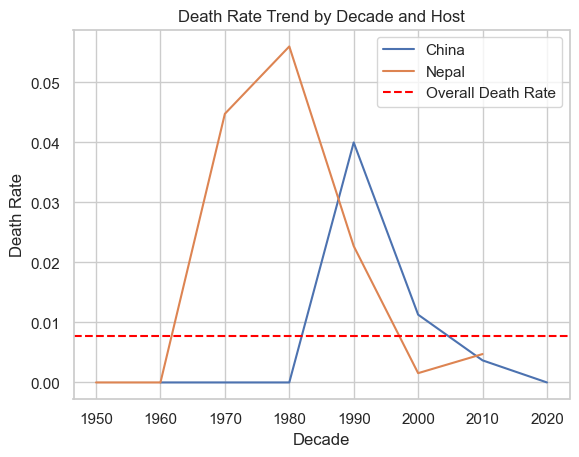

In [1118]:
# Calculate death rates by decade and host
death_rate_by_decade_host = pd.DataFrame(data.groupby(['Decade', 'Host'])['Dth'].apply(lambda x: (x == 'Y').mean()).unstack())

# Calculate overall death rate
overall_death_rate = (data['Dth'] == 'Y').mean()

death_rate_by_decade_host.plot(kind='line')
plt.title('Death Rate Trend by Decade and Host')
plt.xlabel('Decade')
plt.ylabel('Death Rate')
#plt.xticks(rotation=45)
plt.legend(title='Host')

plt.axhline(y=overall_death_rate, color='red', linestyle='--', label='Overall Death Rate')
plt.legend()
plt.grid(True)
#plt.tight_layout()
plt.show()

**1.2.Death Rate prediction for the future years**  
I have implemented the **General additive model (GAM)** as a predictive model to analyze future death rates over time. Even though the number of expeditions is increasing over time, but death rate is decreasing which is good news for expidition lovers. The GAM model predicts that the death rate will be 0.00329 in the year 2040.

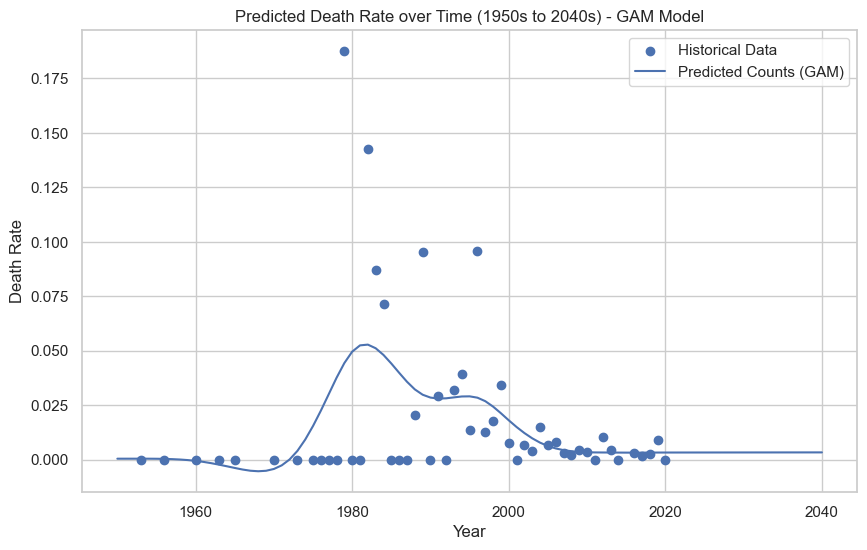

In [1119]:
from pygam import LinearGAM

death_rate_by_year = pd.DataFrame(data.groupby('Year')['Dth'].apply(lambda x: (x == 'Y').mean()))

ab = pd.DataFrame(death_rate_by_year['Dth'])
ab['Year'] = data['Year'].unique()

Death_rate = pd.melt(ab, id_vars='Year', var_name='Host', value_name='Rate')

X = Death_rate['Year'].values.reshape(-1, 1)  # Features (Year)
y = (Death_rate['Rate']) # Target variable

# Fit a GAM model
gam = LinearGAM().fit(X, y)

predicted_counts = gam.predict(X)

years = np.arange(1950, 2041).reshape(-1, 1)

predicted_counts_all_years = gam.predict(years)

#print(f"MSE (GAM): {mse_gam}")
#print(f"R-squared (GAM): {r2_gam}")

# Plotting the predicted counts over time
plt.figure(figsize=(10, 6))
plt.scatter(Death_rate['Year'], Death_rate['Rate'], label='Historical Data')
plt.plot(years, predicted_counts_all_years, label='Predicted Counts (GAM)')

plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.title('Predicted Death Rate over Time (1950s to 2040s) - GAM Model')
plt.legend()
plt.grid(True)
plt.show()

**1.3. Survival probability with the use of Oxygen**
The majority of expeditions are done by using oxygen but there are some expeditions that are done without oxygen. I have analyzed the impact of oxygen on the death rate. I have found that the use of oxygen can improve the death rate. The death probability is higher when the explorer climbs without oxygen. Also, I have plotted the possibility of death by choosing a specific host. My result shows  Nepal is pretty much safer than China.

In [1120]:
import statsmodels.api as sm

# Clean and encode 'Oxy' column
data['Oxy_encoded'] = (data['Oxy'] == 'Y').astype(int)

# Clean and encode 'Host' column
data['Host_encoded'] = (data['Host'] == 'China').astype(int)  # 1 for China, 0 Nepal

data['Dth_encoded'] = (data['Dth'] == 'Y').astype(int)

# Build logistic regression model for oxygen
X_oxy = sm.add_constant(data['Oxy_encoded'])
model_oxy = sm.Logit(data['Dth_encoded'], X_oxy)
result_oxy = model_oxy.fit()

result_oxy.summary()

Optimization terminated successfully.
         Current function value: 0.044170
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Dth_encoded   No. Observations:                 9905
Model:                          Logit   Df Residuals:                     9903
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                 0.02924
Time:                        22:17:08   Log-Likelihood:                -437.51
converged:                       True   LL-Null:                       -450.69
Covariance Type:            nonrobust   LLR p-value:                 2.833e-07
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8170      0.310     -9.076      0.000      -3.425      -2.209
Oxy_encoded    -2.1674      0.334     -6.488      0.000      -2.822      -1.513
===============================================================================
"""

## logistic regression model

Optimization terminated successfully.
         Current function value: 0.045347
         Iterations 9


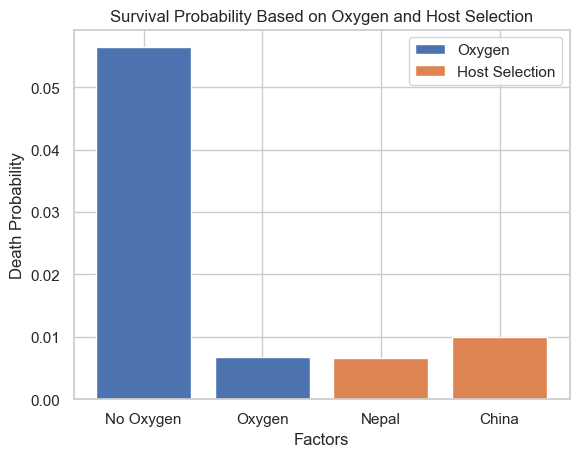

In [1121]:
# Build logistic regression model for host selection
X_host = sm.add_constant(data['Host_encoded'])
model_host = sm.Logit(data['Dth_encoded'], X_host)
result_host = model_host.fit()

# Plotting survival probabilities
oxy_values = np.array([0, 1])
oxy_values = sm.add_constant(oxy_values)
survival_probs_oxy = result_oxy.predict(oxy_values)

host_values = np.array([0, 1])
host_values = sm.add_constant(host_values)
survival_probs_host = result_host.predict(host_values)

plt.bar(['No Oxygen', 'Oxygen'], survival_probs_oxy, label='Oxygen')
plt.bar(['Nepal', 'China'], survival_probs_host, label='Host Selection')
plt.xlabel('Factors')
plt.ylabel('Death Probability')
plt.title('Survival Probability Based on Oxygen and Host Selection')
plt.legend()
plt.show()